### Gradient Tape basic

In [1]:
test1 = [1, 2, 3]
test2 = [10, 20, 30]

In [5]:
t1 = tf.Variable(test1, dtype=tf.float32)
t2 = tf.Variable(test2, dtype=tf.float32)

In [6]:
with tf.GradientTape() as tape:
    t3 = t1 * t2

gradient = tape.gradient(t3, [t1, t2])
print(gradient[0])
print(gradient[1])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [7]:
test1 = [1, 2, 3]
test2 = [10, 20, 30]

In [8]:
t1 = tf.constant(test1, dtype=tf.float32)
t2 = tf.Variable(test2, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(t1)
    t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])

In [9]:
print(gradients[0])
print(gradients[1])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [10]:
## data 선언
x_data =[[1.],[2.],[3.],[4.]]
y_data =[[1.],[3.],[5.],[7.]]

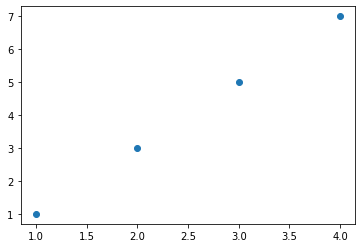

In [11]:
plt.plot(x_data, y_data, 'o')

In [12]:
## 평균 0, 분산 1의 파라미터의 정규분포로 부터 값을 가져옴.
# 학습을 통해 업데이트가 되어 변화되는 모델의 파라미터인 w,b를 의미한다.
W=tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
b=tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
lr = 0.001
history = np.zeros([2000,3], 'float32')

In [13]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


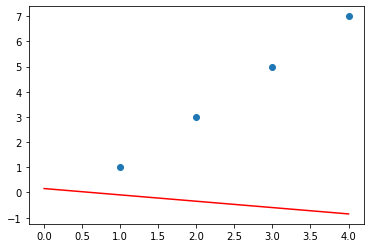

In [14]:
plt.plot(x_data, y_data, 'o')
plt.plot([0,4], [b, (w*4 +B)], 'r-')

In [15]:
w_trace = []
b_trace = []

In [16]:
for epoch in range(2000):
    total_error = 0

    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            y_hat = W * x + b
            error = (y_hat - y) **2
        
        gradients = tape.gradient(error, [W, b])

        W = tf.Variable(W - lr * gradients[0])
        b = tf.Variable(b - lr * gradients[1])

        w_trace.append(W.numpy())
        b_trace.append(b.numpy())

        visual_error = tf.square(error)
        total_error = total_error + visual_error

    print("epoch : ", epoch, "error :", total_error/len(x_data))
    history[epoch,:] = [(total_error/len(x_data))[0], W[0], b[0]]

epoch :  0 error : tf.Tensor([[1117.5668]], shape=(1, 1), dtype=float32)
epoch :  1 error : tf.Tensor([[866.4828]], shape=(1, 1), dtype=float32)
epoch :  2 error : tf.Tensor([[672.61633]], shape=(1, 1), dtype=float32)
epoch :  3 error : tf.Tensor([[522.7964]], shape=(1, 1), dtype=float32)
epoch :  4 error : tf.Tensor([[406.9059]], shape=(1, 1), dtype=float32)
epoch :  5 error : tf.Tensor([[317.17014]], shape=(1, 1), dtype=float32)
epoch :  6 error : tf.Tensor([[247.611]], shape=(1, 1), dtype=float32)
epoch :  7 error : tf.Tensor([[193.6295]], shape=(1, 1), dtype=float32)
epoch :  8 error : tf.Tensor([[151.68535]], shape=(1, 1), dtype=float32)
epoch :  9 error : tf.Tensor([[119.051636]], shape=(1, 1), dtype=float32)
epoch :  10 error : tf.Tensor([[93.62626]], shape=(1, 1), dtype=float32)
epoch :  11 error : tf.Tensor([[73.78763]], shape=(1, 1), dtype=float32)
epoch :  12 error : tf.Tensor([[58.284004]], shape=(1, 1), dtype=float32)
epoch :  13 error : tf.Tensor([[46.14805]], shape=(1, 1

In [17]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


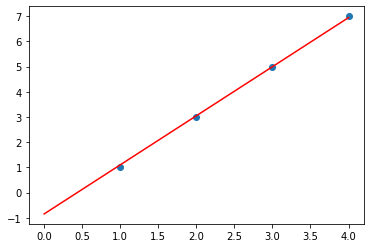

In [18]:
plt.plot(x_data, y_data, 'o')
plt.plot([0, 4], [b, (w*4 + B)], 'r-')

In [19]:
# 학습이 끝난 후 W와 b로 예측

print(history)
print("W :", W)
print("b:", b)
print("input 3", tf.add(tf.matmul([[3.]], W), b))
print("input 4", tf.add(tf.matmul([[4.]], W), b))

[[ 1.1175668e+03 -1.4191562e-01  1.9138418e-01]
 [ 8.6648279e+02 -3.9154794e-02  2.2417870e-01]
 [ 6.7261633e+02  5.6929275e-02  2.5469488e-01]
 ...
 [ 3.2601791e-05  1.9474709e+00 -8.4425235e-01]
 [ 3.2445176e-05  1.9475341e+00 -8.4443974e-01]
 [ 3.2289343e-05  1.9475971e+00 -8.4462690e-01]]
W : <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.9475971]], dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.8446269]], dtype=float32)>
input 3 tf.Tensor([[4.9981647]], shape=(1, 1), dtype=float32)
input 4 tf.Tensor([[6.9457617]], shape=(1, 1), dtype=float32)


Text(0, 0.5, 'loss')

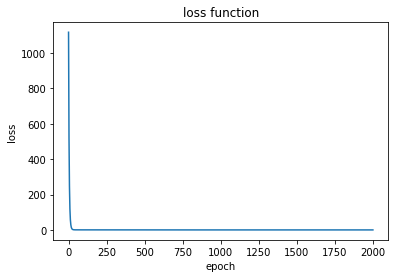

In [20]:
# loss function
plt.plot(history[:,0])
plt.title('loss function')
plt.xlabel('epoch')
plt.ylabel('loss')

In [21]:
a = np.array(w_trace)
a = a.reshape(8000,1)

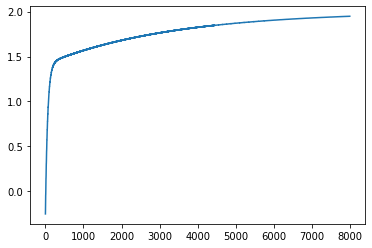

In [22]:
plt.plot(a)